In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import pandas.io.sql as psql
%matplotlib inline


In [2]:
connection = psy.connect("dbname=nytd_clean_data user=cguy")

cohort_1 = psql.read_sql("SELECT * FROM cohort_1", connection)

In [3]:
cohort_1 = cohort_1.drop('index',axis=1)
cohort_1.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
1,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
3,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17


In [4]:
cohort_1.dtypes

Wave                        object
StFCID                      object
RepDate_outcomes    datetime64[ns]
OutcmRpt                    object
OutcmDte            datetime64[ns]
OutcmFCS                    object
CurrFTE                     object
CurrPTE                     object
EmplySklls                  object
SocSecrty                   object
EducAid                     object
PubFinAs                    object
PubFoodAs                   object
PubHousAs                   object
OthrFinAs                   object
HighEdCert                  object
CurrenRoll                  object
CnctAdult                   object
Homeless                    object
SubAbuse                    object
Incarc                      object
Children                    object
Marriage                    object
Medicaid                    object
OthrHlthIn                  object
MedicalIn                   object
MentlHlthIn                 object
PrescripIn                  object
SampleState         

# Distribution of Demographics

In [16]:
cohort_1.Wave.value_counts()

Wave 1: Age 17 Baseline Survey    22111
Wave 2: Age 19 Followup           11906
Name: Wave, dtype: int64

In [32]:
demographics = cohort_1[['St','DelinqntSv','Sex','Race','TribeSv','EdLevlSv','SpecEdSv','RaceEthn','AgeMP','Wave']]
demographics_W1 = demographics[demographics.Wave == "Wave 1: Age 17 Baseline Survey"]
demographics_W2 = demographics[demographics.Wave == "Wave 2: Age 19 Followup"]


def graph_demos(column, figsize_i=(6,6)):
    dist = demographics_W1[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=figsize_i)

demographics_W1.describe(include='all')

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
count,22111,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wave 1: Age 17 Baseline Survey
freq,5500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22111
mean,NaN,12.291348,1.506897,11.988422,12.172312,21.402243,12.512369,5.280494,16.560355,NaN
std,NaN,27.988233,0.499964,29.961278,28.056960,25.337851,28.125593,15.140712,0.528911,NaN
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,14.000000,NaN
25%,NaN,0.000000,1.000000,1.000000,0.000000,9.000000,0.000000,1.000000,16.000000,NaN
50%,NaN,0.000000,2.000000,2.000000,0.000000,10.000000,0.000000,2.000000,17.000000,NaN
75%,NaN,1.000000,2.000000,2.000000,0.000000,11.000000,1.000000,6.000000,17.000000,NaN


,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
St,,,,,,,,,
AK,84,84,84,84,84,84,84,84,84
AL,148,148,148,148,148,148,148,148,148
AR,331,331,331,331,331,331,331,331,331
AZ,548,548,548,548,548,548,548,548,548
CA,5500,5500,5500,5500,5500,5500,5500,5500,5500
CO,414,414,414,414,414,414,414,414,414
DC,97,97,97,97,97,97,97,97,97
DE,190,190,190,190,190,190,190,190,190
FL,830,830,830,830,830,830,830,830,830


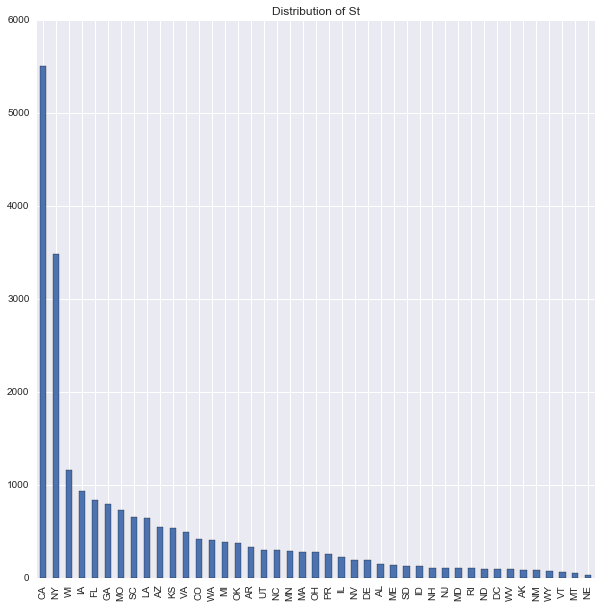

In [34]:
graph_demos('St',(10,10))
demographics_W1.groupby(['St']).count()

,St,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
DelinqntSv,,,,,,,,,
0,15121,15121,15121,15121,15121,15121,15121,15121,15121
1,3506,3506,3506,3506,3506,3506,3506,3506,3506
77,3484,3484,3484,3484,3484,3484,3484,3484,3484


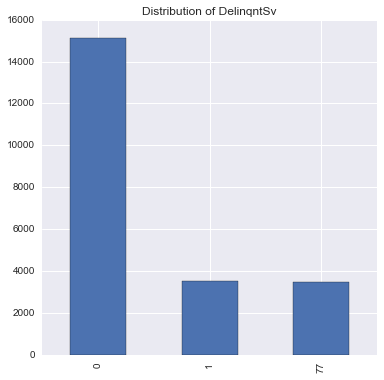

In [35]:
graph_demos('DelinqntSv')

demographics_W1.groupby(['DelinqntSv']).count()


,St,DelinqntSv,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
Sex,,,,,,,,,
1,10903,10903,10903,10903,10903,10903,10903,10903,10903
2,11208,11208,11208,11208,11208,11208,11208,11208,11208


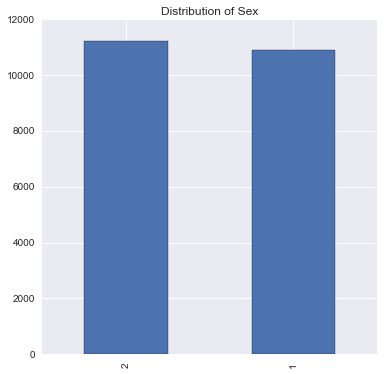

In [36]:
graph_demos('Sex')
demographics_W1.groupby(['Sex']).count()


,St,DelinqntSv,Sex,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
Race,,,,,,,,,
1,10919,10919,10919,10919,10919,10919,10919,10919,10919
2,7199,7199,7199,7199,7199,7199,7199,7199,7199
3,452,452,452,452,452,452,452,452,452
4,250,250,250,250,250,250,250,250,250
5,56,56,56,56,56,56,56,56,56
6,894,894,894,894,894,894,894,894,894
99,2341,2341,2341,2341,2341,2341,2341,2341,2341


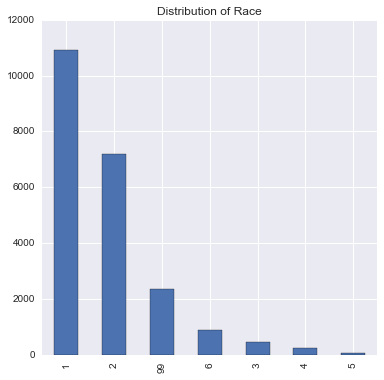

In [41]:
graph_demos('Race')
demographics_W1.groupby(['Race']).count()

,St,DelinqntSv,Sex,Race,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
TribeSv,,,,,,,,,
0,18057,18057,18057,18057,18057,18057,18057,18057,18057
1,566,566,566,566,566,566,566,566,566
77,3488,3488,3488,3488,3488,3488,3488,3488,3488


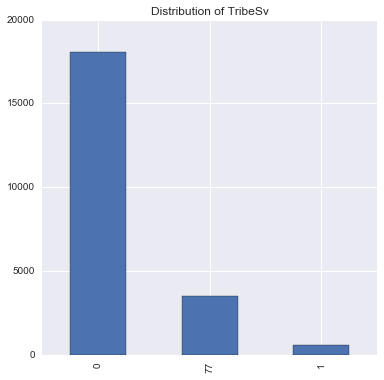

In [47]:
graph_demos('TribeSv')
demographics_W1.groupby(['TribeSv']).count()

In [ ]:
N = 22111.0
566/N*100

,St,DelinqntSv,Sex,Race,TribeSv,SpecEdSv,RaceEthn,AgeMP,Wave
EdLevlSv,,,,,,,,,
0,178,178,178,178,178,178,178,178,178
6,117,117,117,117,117,117,117,117,117
7,284,284,284,284,284,284,284,284,284
8,1341,1341,1341,1341,1341,1341,1341,1341,1341
9,3857,3857,3857,3857,3857,3857,3857,3857,3857
10,6340,6340,6340,6340,6340,6340,6340,6340,6340
11,5072,5072,5072,5072,5072,5072,5072,5072,5072
12,919,919,919,919,919,919,919,919,919
13,127,127,127,127,127,127,127,127,127


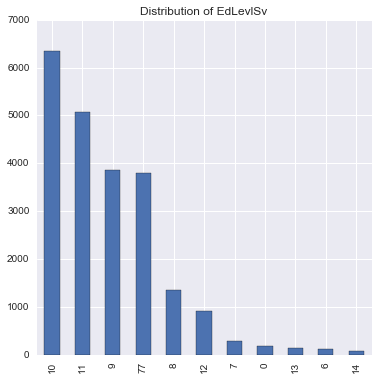

In [51]:
graph_demos('EdLevlSv')
demographics_W1.groupby(['EdLevlSv']).count()

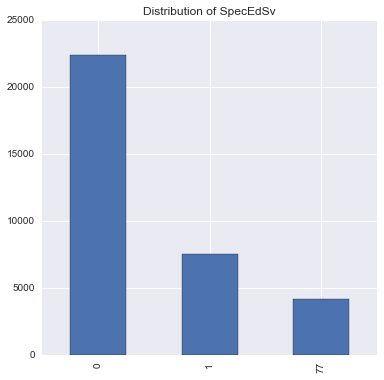

In [58]:
graph_demos('SpecEdSv')
demographics_W1.groupby(['SpecEdSv']).count()

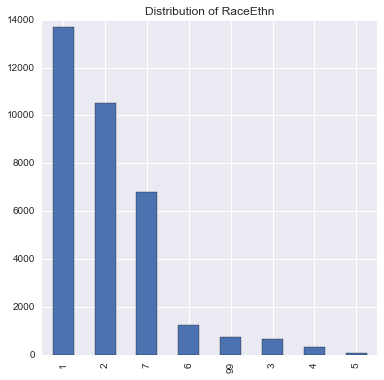

In [59]:
graph_demos('RaceEthn')
demographics_W1.groupby(['RaceEthn']).count()

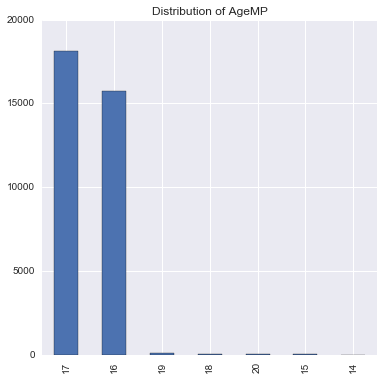

In [60]:
graph_demos('AgeMP')
demographics_W1.groupby(['AgeMP']).count()

In [ ]:
###Need to relearn subplots stuff....

# # Working with multiple figure windows and subplots

# plt.figure(1)
# plt.subplot(211)
# plt.plot(t, s1)
# plt.subplot(212)
# plt.plot(t, 2*s1)

# plt.figure(2)
# plt.plot(t, s2)

# # now switch back to figure 1 and make some changes
# plt.figure(1)
# plt.subplot(211)
# plt.plot(t, s2, 'gs')
# ax = plt.gca()
# ax.set_xticklabels([])

# plt.show()

____________________________________________________________________________________________________________

# Distributions of Services

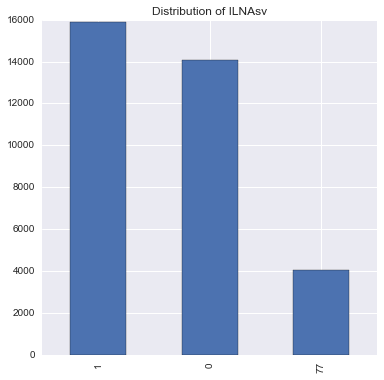

In [61]:
services = cohort_1[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv']]

def graph_serv(column):
    dist = services[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=(6,6))

graph_serv('ILNAsv')

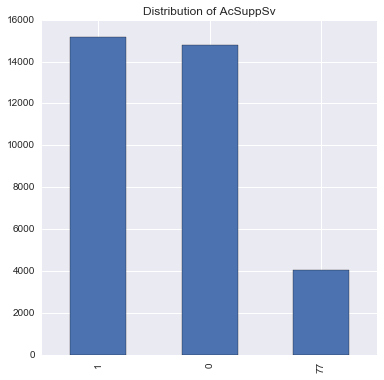

In [62]:
graph_serv('AcSuppSv')

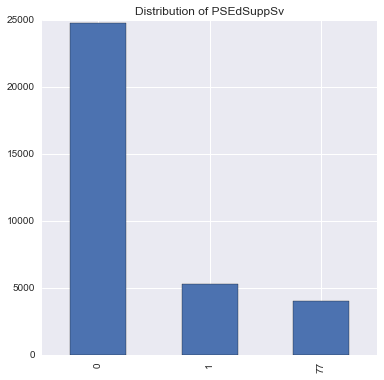

In [63]:
graph_serv('PSEdSuppSv')

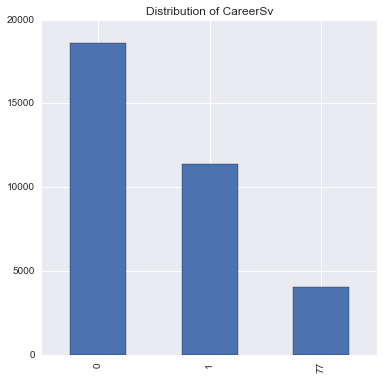

In [64]:
graph_serv('CareerSv')

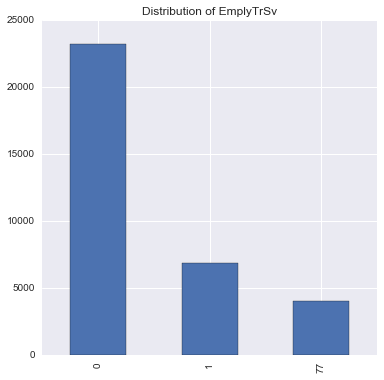

In [65]:
graph_serv('EmplyTrSv')


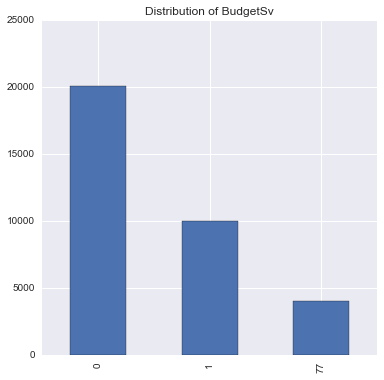

In [66]:
graph_serv('BudgetSv')


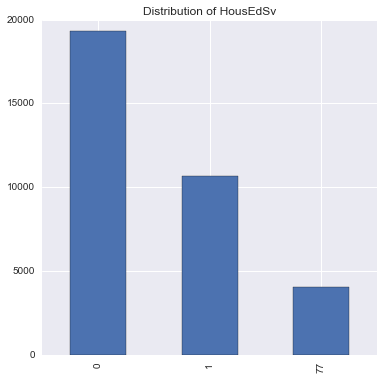

In [68]:
graph_serv('HousEdSv')


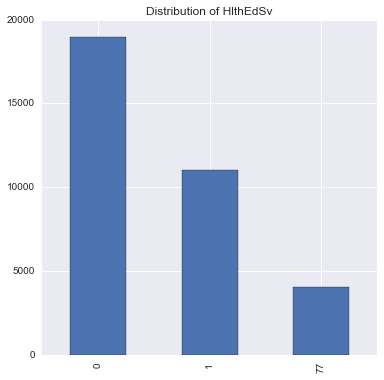

In [69]:
graph_serv('HlthEdSv')


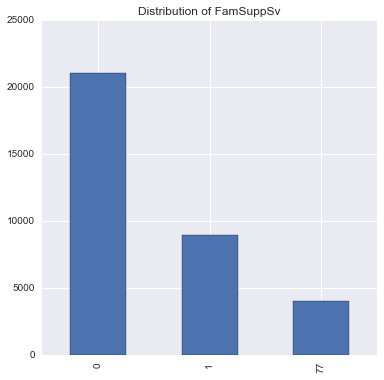

In [70]:
graph_serv('FamSuppSv')


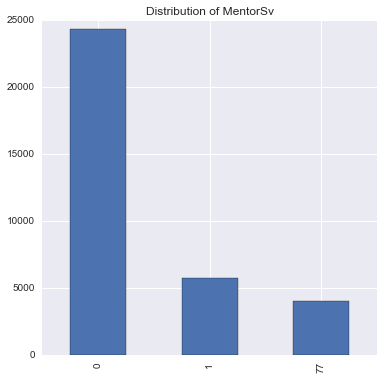

In [71]:
graph_serv('MentorSv')


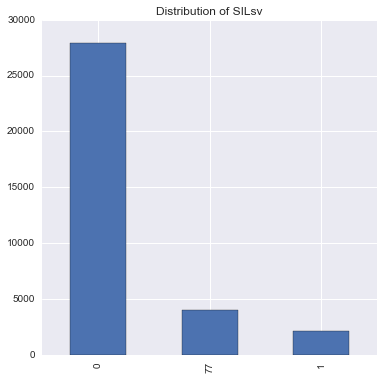

In [72]:
graph_serv('SILsv')


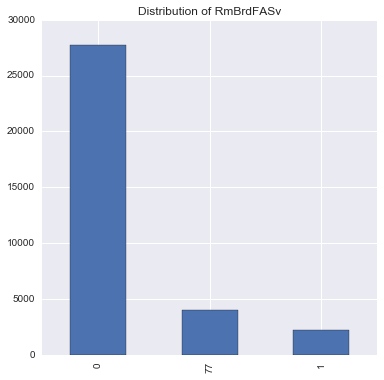

In [73]:
graph_serv('RmBrdFASv')


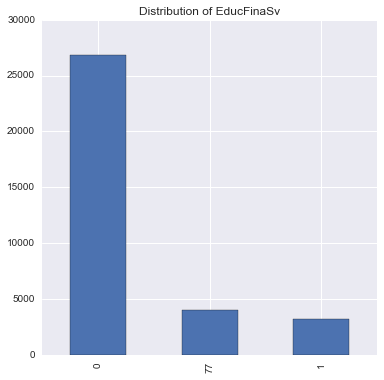

In [74]:
graph_serv('EducFinaSv')


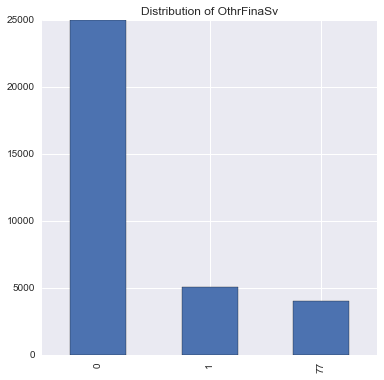

In [75]:
graph_serv('OthrFinaSv')

____________________________________________________________________________________________________________

# Distributions of Outcomes


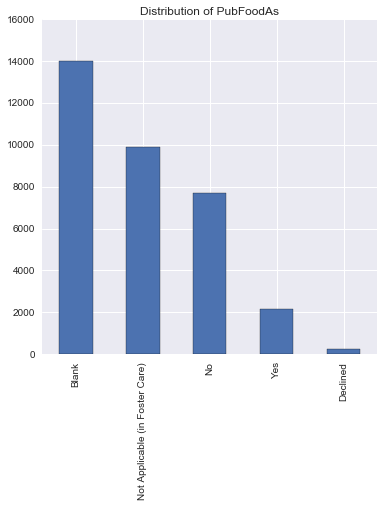

In [76]:
outcomes = cohort_1[['PubFoodAs','PubHousAs','OthrFinAs','HighEdCert','CurrFTE','CurrPTE','EmplySklls','SocSecrty',\
                     'EducAid','PubFinAs','CurrenRoll','CnctAdult','PrescripIn','Homeless','SubAbuse','Incarc',\
                     'Children','Marriage','Medicaid','OthrHlthIn','MedicalIn','MentlHlthIn']]

def graph_outcm(column):
    dist = outcomes[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=(6,6))

graph_outcm('PubFoodAs')

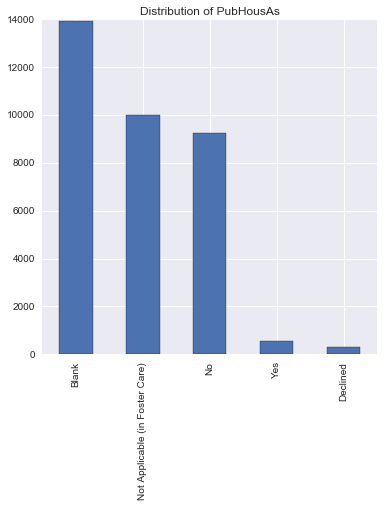

In [77]:
graph_outcm('PubHousAs')

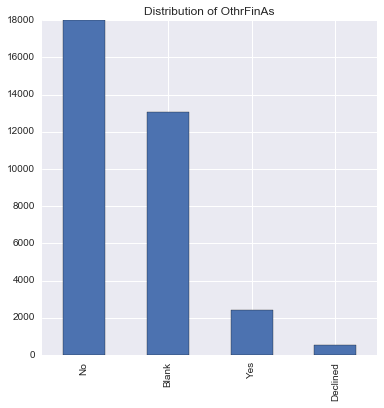

In [78]:
graph_outcm('OthrFinAs')

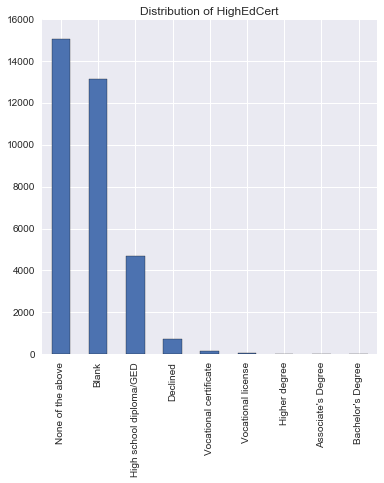

In [79]:
graph_outcm('HighEdCert')

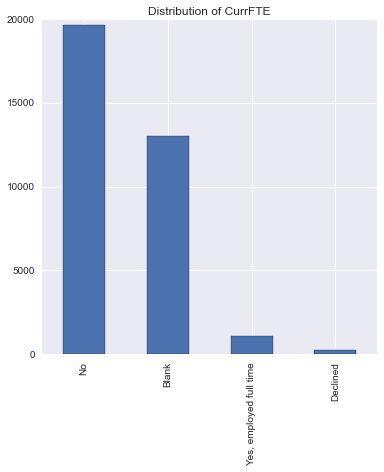

In [80]:
graph_outcm('CurrFTE')


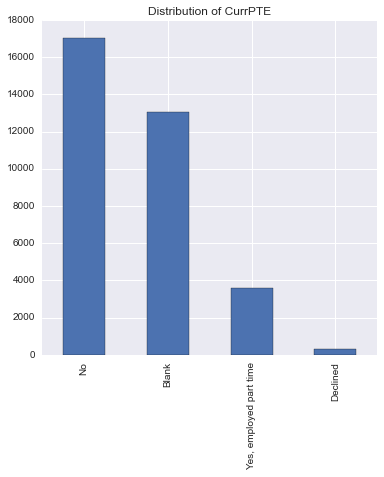

In [81]:
graph_outcm('CurrPTE')


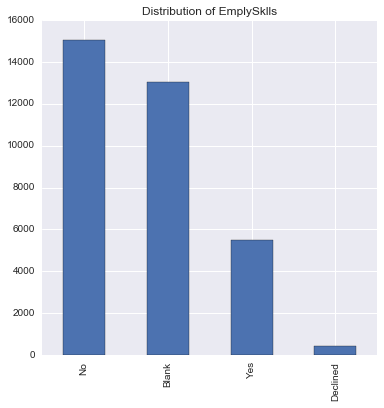

In [82]:
graph_outcm('EmplySklls')


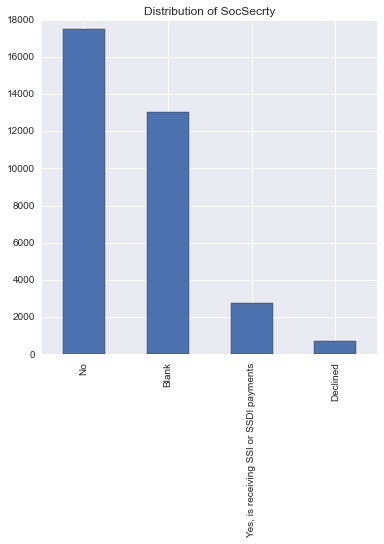

In [83]:
graph_outcm('SocSecrty')


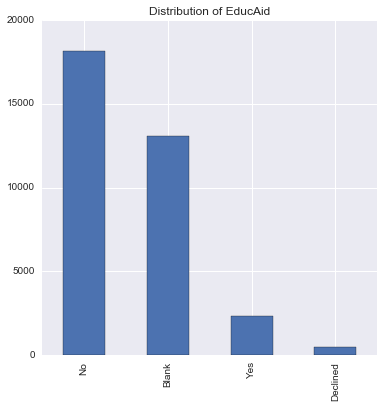

In [84]:
graph_outcm('EducAid')


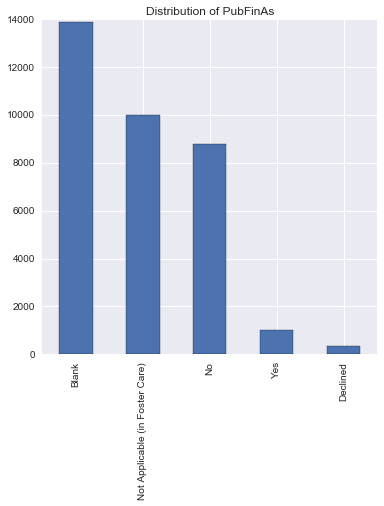

In [85]:
graph_outcm('PubFinAs')


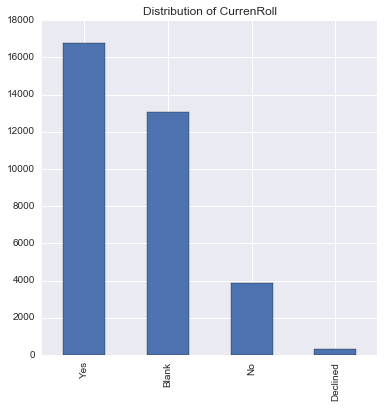

In [86]:
graph_outcm('CurrenRoll')


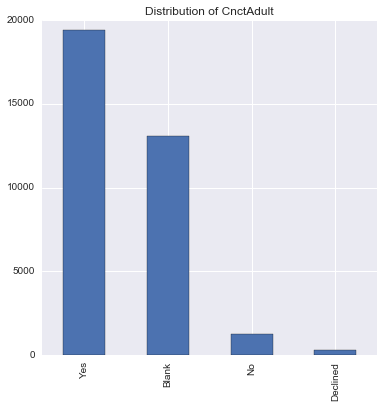

In [87]:
graph_outcm('CnctAdult')


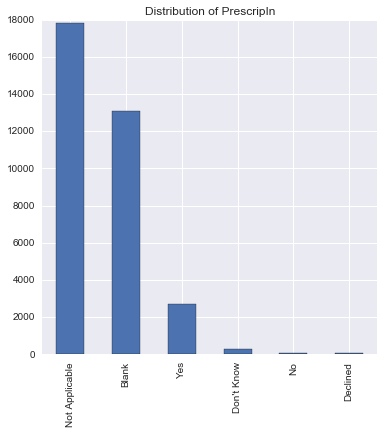

In [88]:
graph_outcm('PrescripIn')


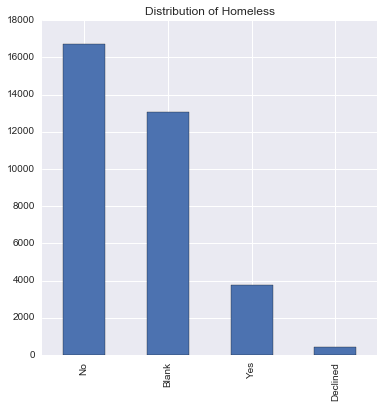

In [89]:
graph_outcm('Homeless')


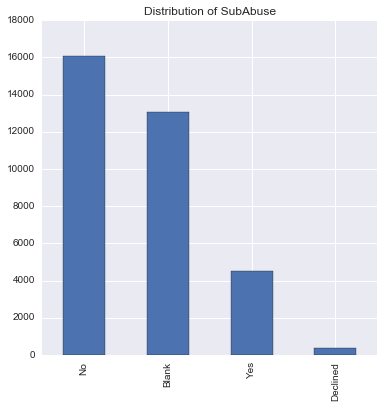

In [90]:
graph_outcm('SubAbuse')


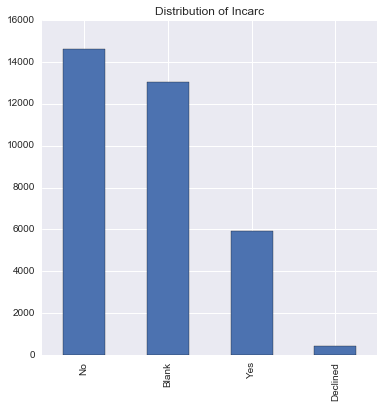

In [91]:
graph_outcm('Incarc')


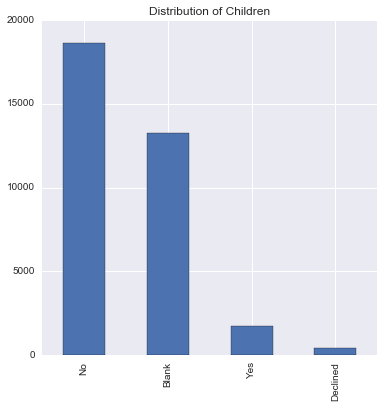

In [92]:
graph_outcm('Children')


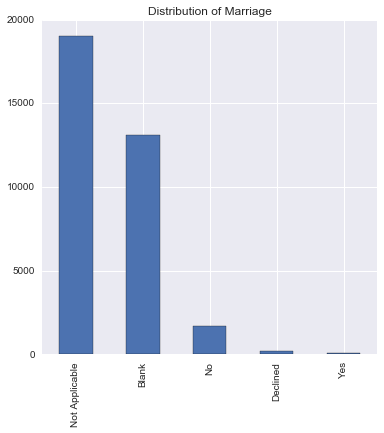

In [93]:
graph_outcm('Marriage')


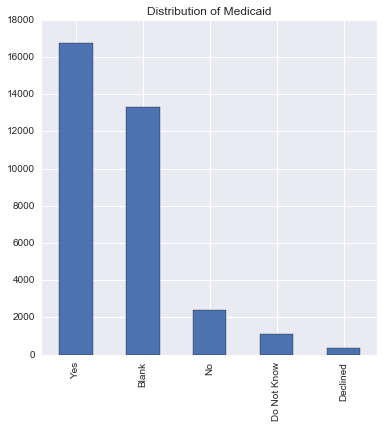

In [94]:
graph_outcm('Medicaid')


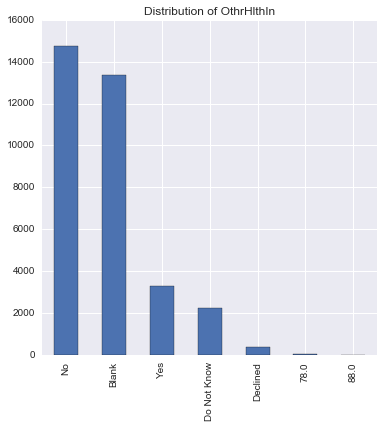

In [95]:
graph_outcm('OthrHlthIn')


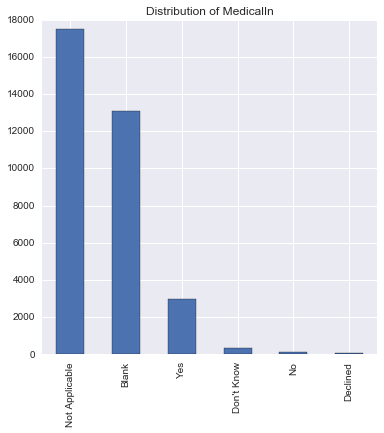

In [96]:
graph_outcm('MedicalIn')


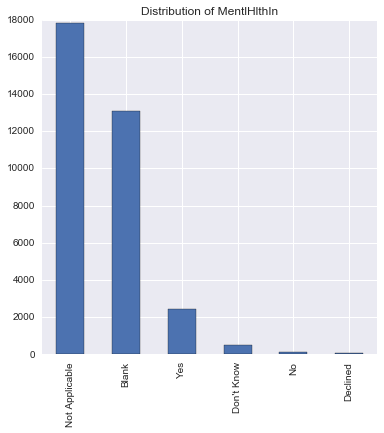

In [97]:
graph_outcm('MentlHlthIn')

____________________________________________________________________________________________________________

# Distributions of Info

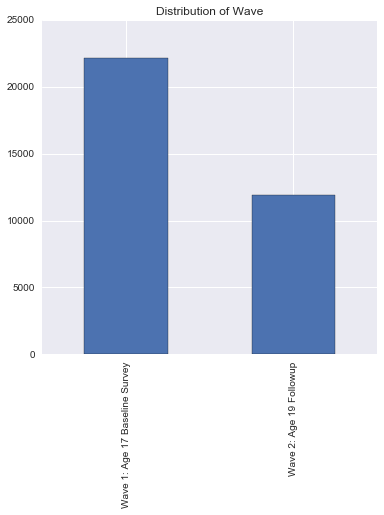

In [99]:
info = cohort_1[['Wave','RepDate_outcomes','SampleState','InSample','Baseline','FY11Cohort','Elig19','OutcmRpt',\
                 'OutcmDte','OutcmFCS','Responded','FY','RepDate_services','FCStatSv']]

def graph_info(column):
    dist = info[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=(6,6))

graph_info('Wave')


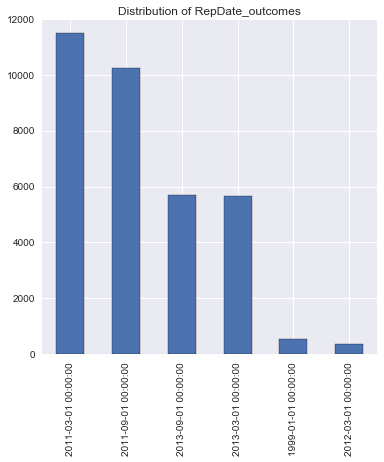

In [100]:
graph_info('RepDate_outcomes')


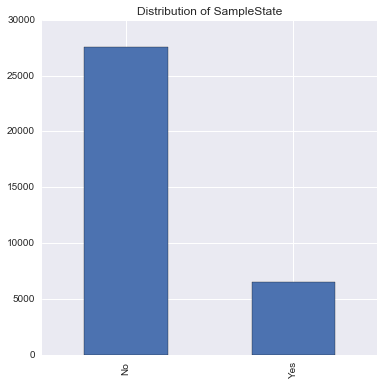

In [101]:
graph_info('SampleState')


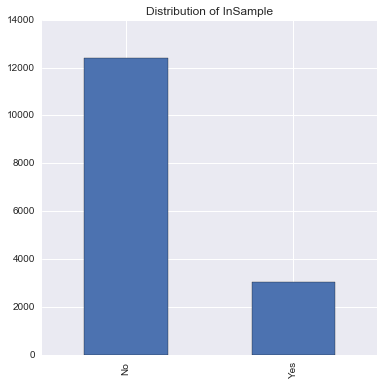

In [102]:
graph_info('InSample')


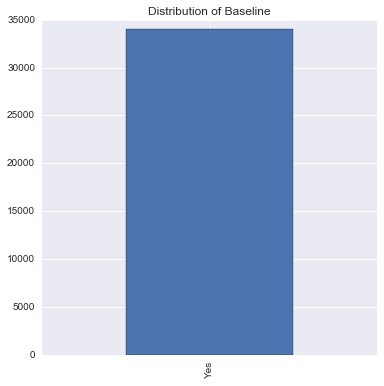

In [103]:
graph_info('Baseline')


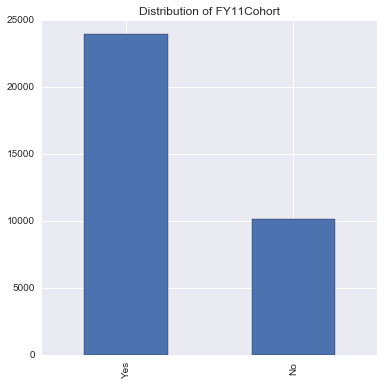

In [104]:
graph_info('FY11Cohort')


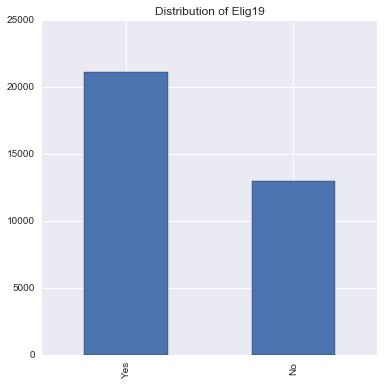

In [105]:
graph_info('Elig19')


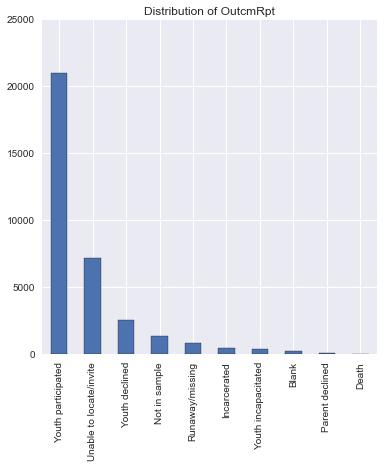

In [106]:
graph_info('OutcmRpt')


In [123]:
# # outcome_date_no_nans = info['OutcmDte'].dropna()
# outcome_date_no_nans
# # outcome_date_no_nans.plot(kind='line')

# import datetime as dt

# x = [outcome_date_no_nans]
# y = range(len(x)) # many thanks to Kyss Tao for setting me straight here

# import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.plot(x,y)
# plt.gcf().autofmt_xdate()

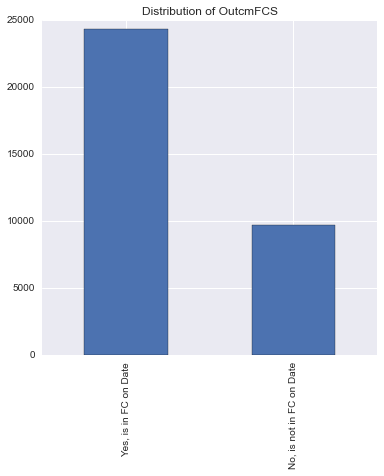

In [118]:
graph_info('OutcmFCS')


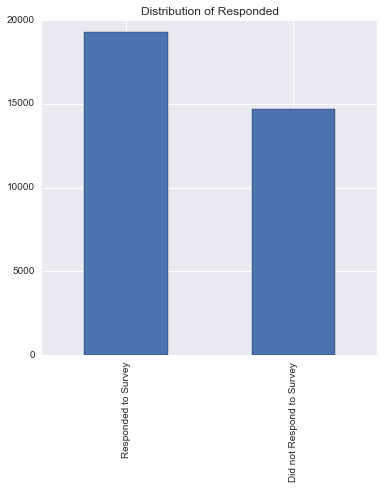

In [119]:
graph_info('Responded')


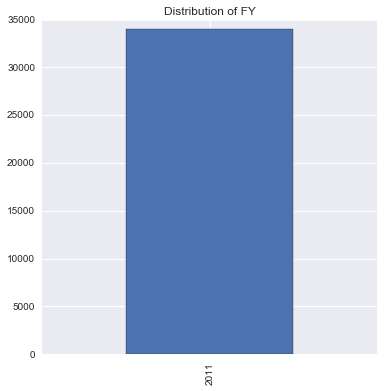

In [120]:
graph_info('FY')


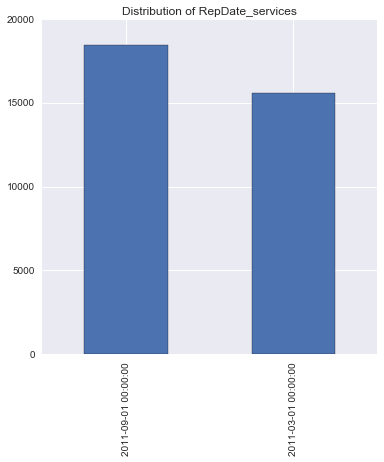

In [121]:
graph_info('RepDate_services')


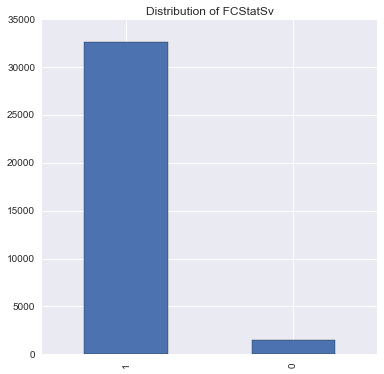

In [122]:
graph_info('FCStatSv')

_____________________________________________________________________________________________________________________

# BiVariate Analysis

In [152]:
mentor_adcn = pd.pivot_table(cohort_1, values='StFCID',index=['CnctAdult'],columns=['MentorSv'],aggfunc='count')
mentor_adcn


MentorSv,0,1,77
CnctAdult,,,
Blank,8087.0,1760.0,3214.0
Declined,278.0,46.0,NaN
No,988.0,203.0,55.0
Yes,14956.0,3671.0,759.0


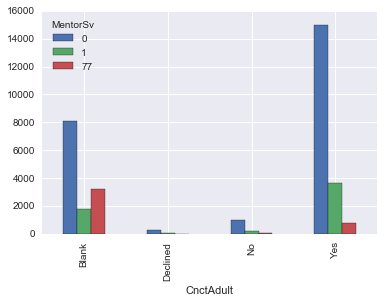

In [153]:
mentor_adcn.plot(kind='bar')

In [155]:
edFin_edCert = pd.pivot_table(cohort_1, values='StFCID',index=['HighEdCert'],columns=['EducFinaSv'],aggfunc='count')
edFin_edCert

EducFinaSv,0,1,77
HighEdCert,,,
Associate's Degree,9.0,1.0,NaN
Bachelor's Degree,6.0,NaN,NaN
Blank,8949.0,978.0,3215.0
Declined,657.0,73.0,4.0
High school diploma/GED,3961.0,595.0,143.0
Higher degree,13.0,4.0,NaN
None of the above,12911.0,1471.0,659.0
Vocational certificate,119.0,11.0,2.0
Vocational license,23.0,7.0,5.0


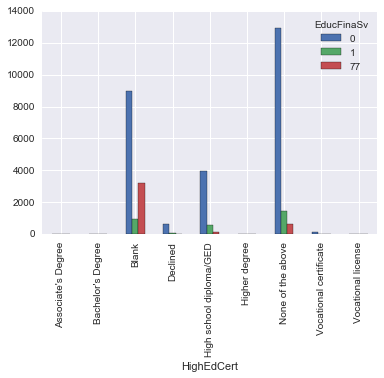

In [156]:
edFin_edCert.plot(kind='bar')

In [157]:
CareerSv_CurrFTE = pd.pivot_table(cohort_1, values='StFCID',index=['CurrFTE'],columns=['CareerSv'],aggfunc='count')
CareerSv_CurrFTE

CareerSv,0,1,77
CurrFTE,,,
Blank,6264,3567,3214
Declined,143,83,6
No,11583,7305,752
"Yes, employed full time",614,430,56


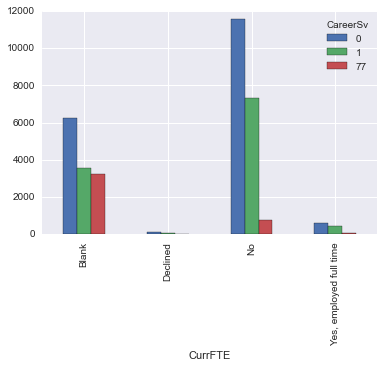

In [158]:
CareerSv_CurrFTE.plot(kind='bar')

In [159]:
ILNAsv_home = pd.pivot_table(cohort_1, values='StFCID',index=['Homeless'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_home

ILNAsv,0,1,77
Homeless,,,
Blank,4616.0,5235.0,3214.0
Declined,212.0,226.0,NaN
No,7548.0,8442.0,748.0
Yes,1715.0,1995.0,66.0


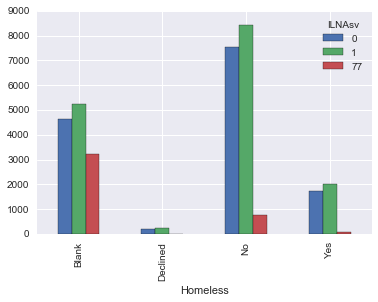

In [160]:
ILNAsv_home.plot(kind='bar')

In [163]:
ILNAsv_incarc = pd.pivot_table(cohort_1, values='StFCID',index=['Incarc'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_incarc

ILNAsv,0,1,77
Incarc,,,
Blank,4606,5230,3214
Declined,202,217,12
No,6746,7275,587
Yes,2537,3176,215


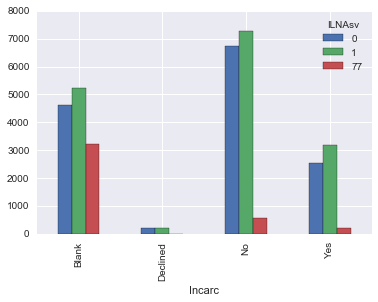

In [164]:
ILNAsv_incarc.plot(kind='bar')

In [165]:
ILNAsv_subAbu = pd.pivot_table(cohort_1, values='StFCID',index=['SubAbuse'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_subAbu

ILNAsv,0,1,77
SubAbuse,,,
Blank,4606,5231,3214
Declined,174,203,4
No,7383,8089,622
Yes,1928,2375,188


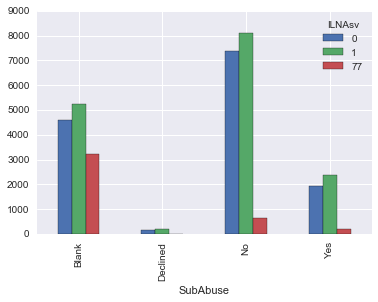

In [166]:
ILNAsv_subAbu.plot(kind='bar')

In [167]:
ILNAsv_CurrPTE = pd.pivot_table(cohort_1, values='StFCID',index=['CurrPTE'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_CurrPTE

ILNAsv,0,1,77
CurrPTE,,,
Blank,4600,5247,3214
Declined,164,163,4
No,7706,8694,652
"Yes, employed part time",1621,1794,158


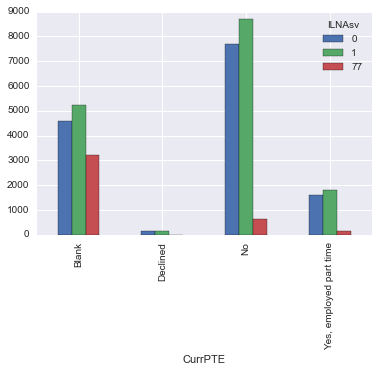

In [168]:
ILNAsv_CurrPTE.plot(kind='bar')